# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Junpito Salim
- Email: junpitosalim@gmail.com
- Id Dicoding:

# 1| Persiapan

## 1.1| Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.regularizers import l2

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import random as rn

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## 1.2| Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 2| Data Understanding

In [3]:
df.shape

(4424, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
#periksa data kosong
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.duplicated().sum()

0

check unique valie in dataset

In [7]:
df.nunique().sort_values()

Scholarship_holder                                2
International                                     2
Gender                                            2
Tuition_fees_up_to_date                           2
Daytime_evening_attendance                        2
Debtor                                            2
Educational_special_needs                         2
Displaced                                         2
Status                                            3
Marital_status                                    6
Application_order                                 8
Inflation_rate                                    9
Unemployment_rate                                10
Curricular_units_2nd_sem_without_evaluations     10
GDP                                              10
Curricular_units_1st_sem_without_evaluations     11
Previous_qualification                           17
Course                                           17
Application_mode                                 18
Curricular_u

<Axes: xlabel='Status', ylabel='Count'>

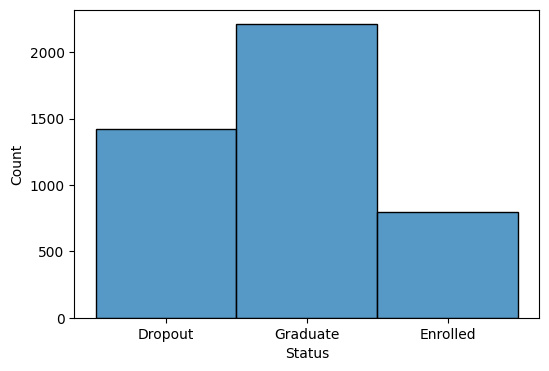

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Status'],kde=False)

In [9]:
#sns.pairplot(df)

untuk mempermudah analisis data akan di bagi ke dalam beberapa bagian:

## 2.1| Demografis
Data yang terkait dengan informasi personal dan latar belakang keluarga siswa.

- `Marital status`: Status pernikahan.
- `Nacionality`: Kewarganegaraan.
- `Gender`: Jenis kelamin.
- `Age at enrollment`: Usia saat pendaftaran.
- `Mother's qualification`: Kualifikasi pendidikan ibu.
- `Father's qualification`: Kualifikasi pendidikan ayah.
- `Mother's occupation`: Pekerjaan ibu.
- `Father's occupation`: Pekerjaan ayah.

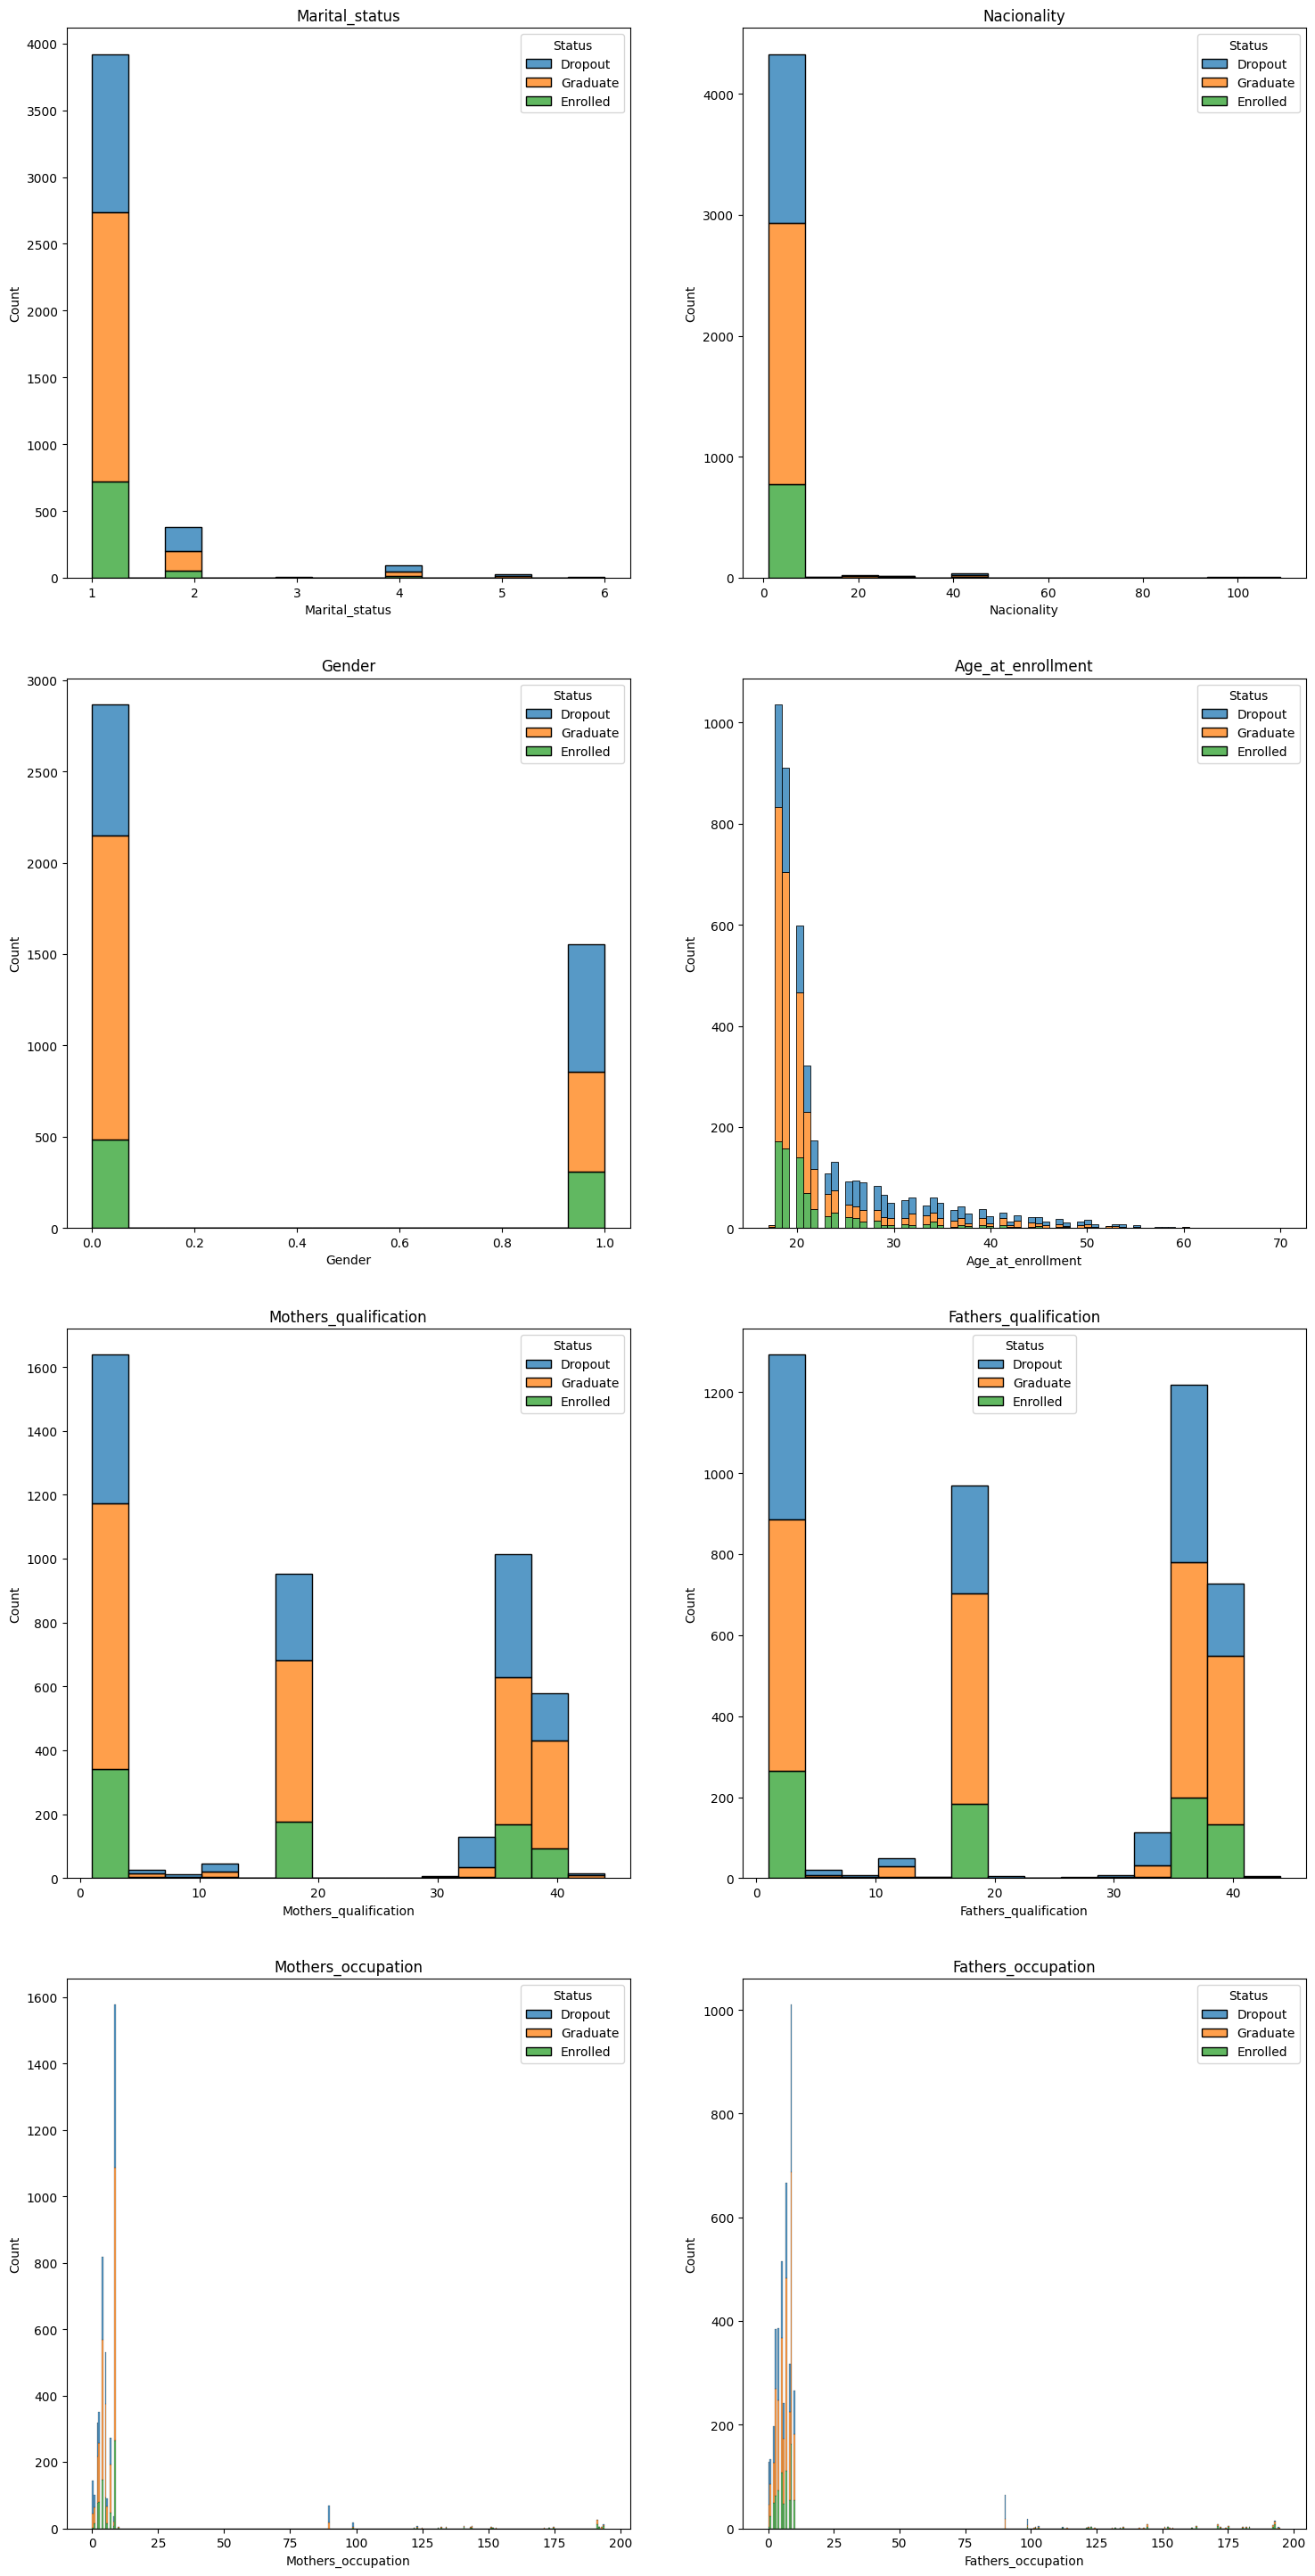

In [10]:
# Plot setup
fig, ax = plt.subplots(4, 2, figsize=(16, 30))
fig.tight_layout(pad=6.0)

# Visualize for each variable
sns.histplot(data=df, x='Marital_status', hue='Status', multiple='stack', ax=ax[0,0])
ax[0,0].set_title('Marital_status')

sns.histplot(data=df, x='Nacionality', hue='Status', multiple='stack', ax=ax[0,1])
ax[0,1].set_title('Nacionality')

sns.histplot(data=df, x='Gender', hue='Status', multiple='stack', ax=ax[1,0])
ax[1,0].set_title('Gender')

sns.histplot(data=df, x='Age_at_enrollment', hue='Status', multiple='stack', ax=ax[1,1])
ax[1,1].set_title('Age_at_enrollment')

sns.histplot(data=df, x='Mothers_qualification', hue='Status', multiple='stack', ax=ax[2,0])
ax[2,0].set_title('Mothers_qualification')

sns.histplot(data=df, x='Fathers_qualification', hue='Status', multiple='stack', ax=ax[2,1])
ax[2,1].set_title('Fathers_qualification')

sns.histplot(data=df, x='Mothers_occupation', hue='Status', multiple='stack', ax=ax[3,0])
ax[3,0].set_title('Mothers_occupation')

sns.histplot(data=df, x='Fathers_occupation', hue='Status', multiple='stack', ax=ax[3,1])
ax[3,1].set_title('Fathers_occupation')

plt.show()

## 2.2| Akademik

Data yang berkaitan dengan jalur pendidikan dan kinerja akademik siswa.

- `Course`: Program studi yang diambil.
- `Daytime/evening attendance`: Jadwal kuliah (siang/malam).
- `Previous qualification`: Kualifikasi sebelum mendaftar ke perguruan tinggi.
- `Previous qualification (grade)`: Nilai kualifikasi sebelumnya.
- `Admission grade`: Nilai masuk.
- `Application mode`: Cara atau jalur pendaftaran.
- `Application order`: Urutan pilihan program studi saat pendaftaran.

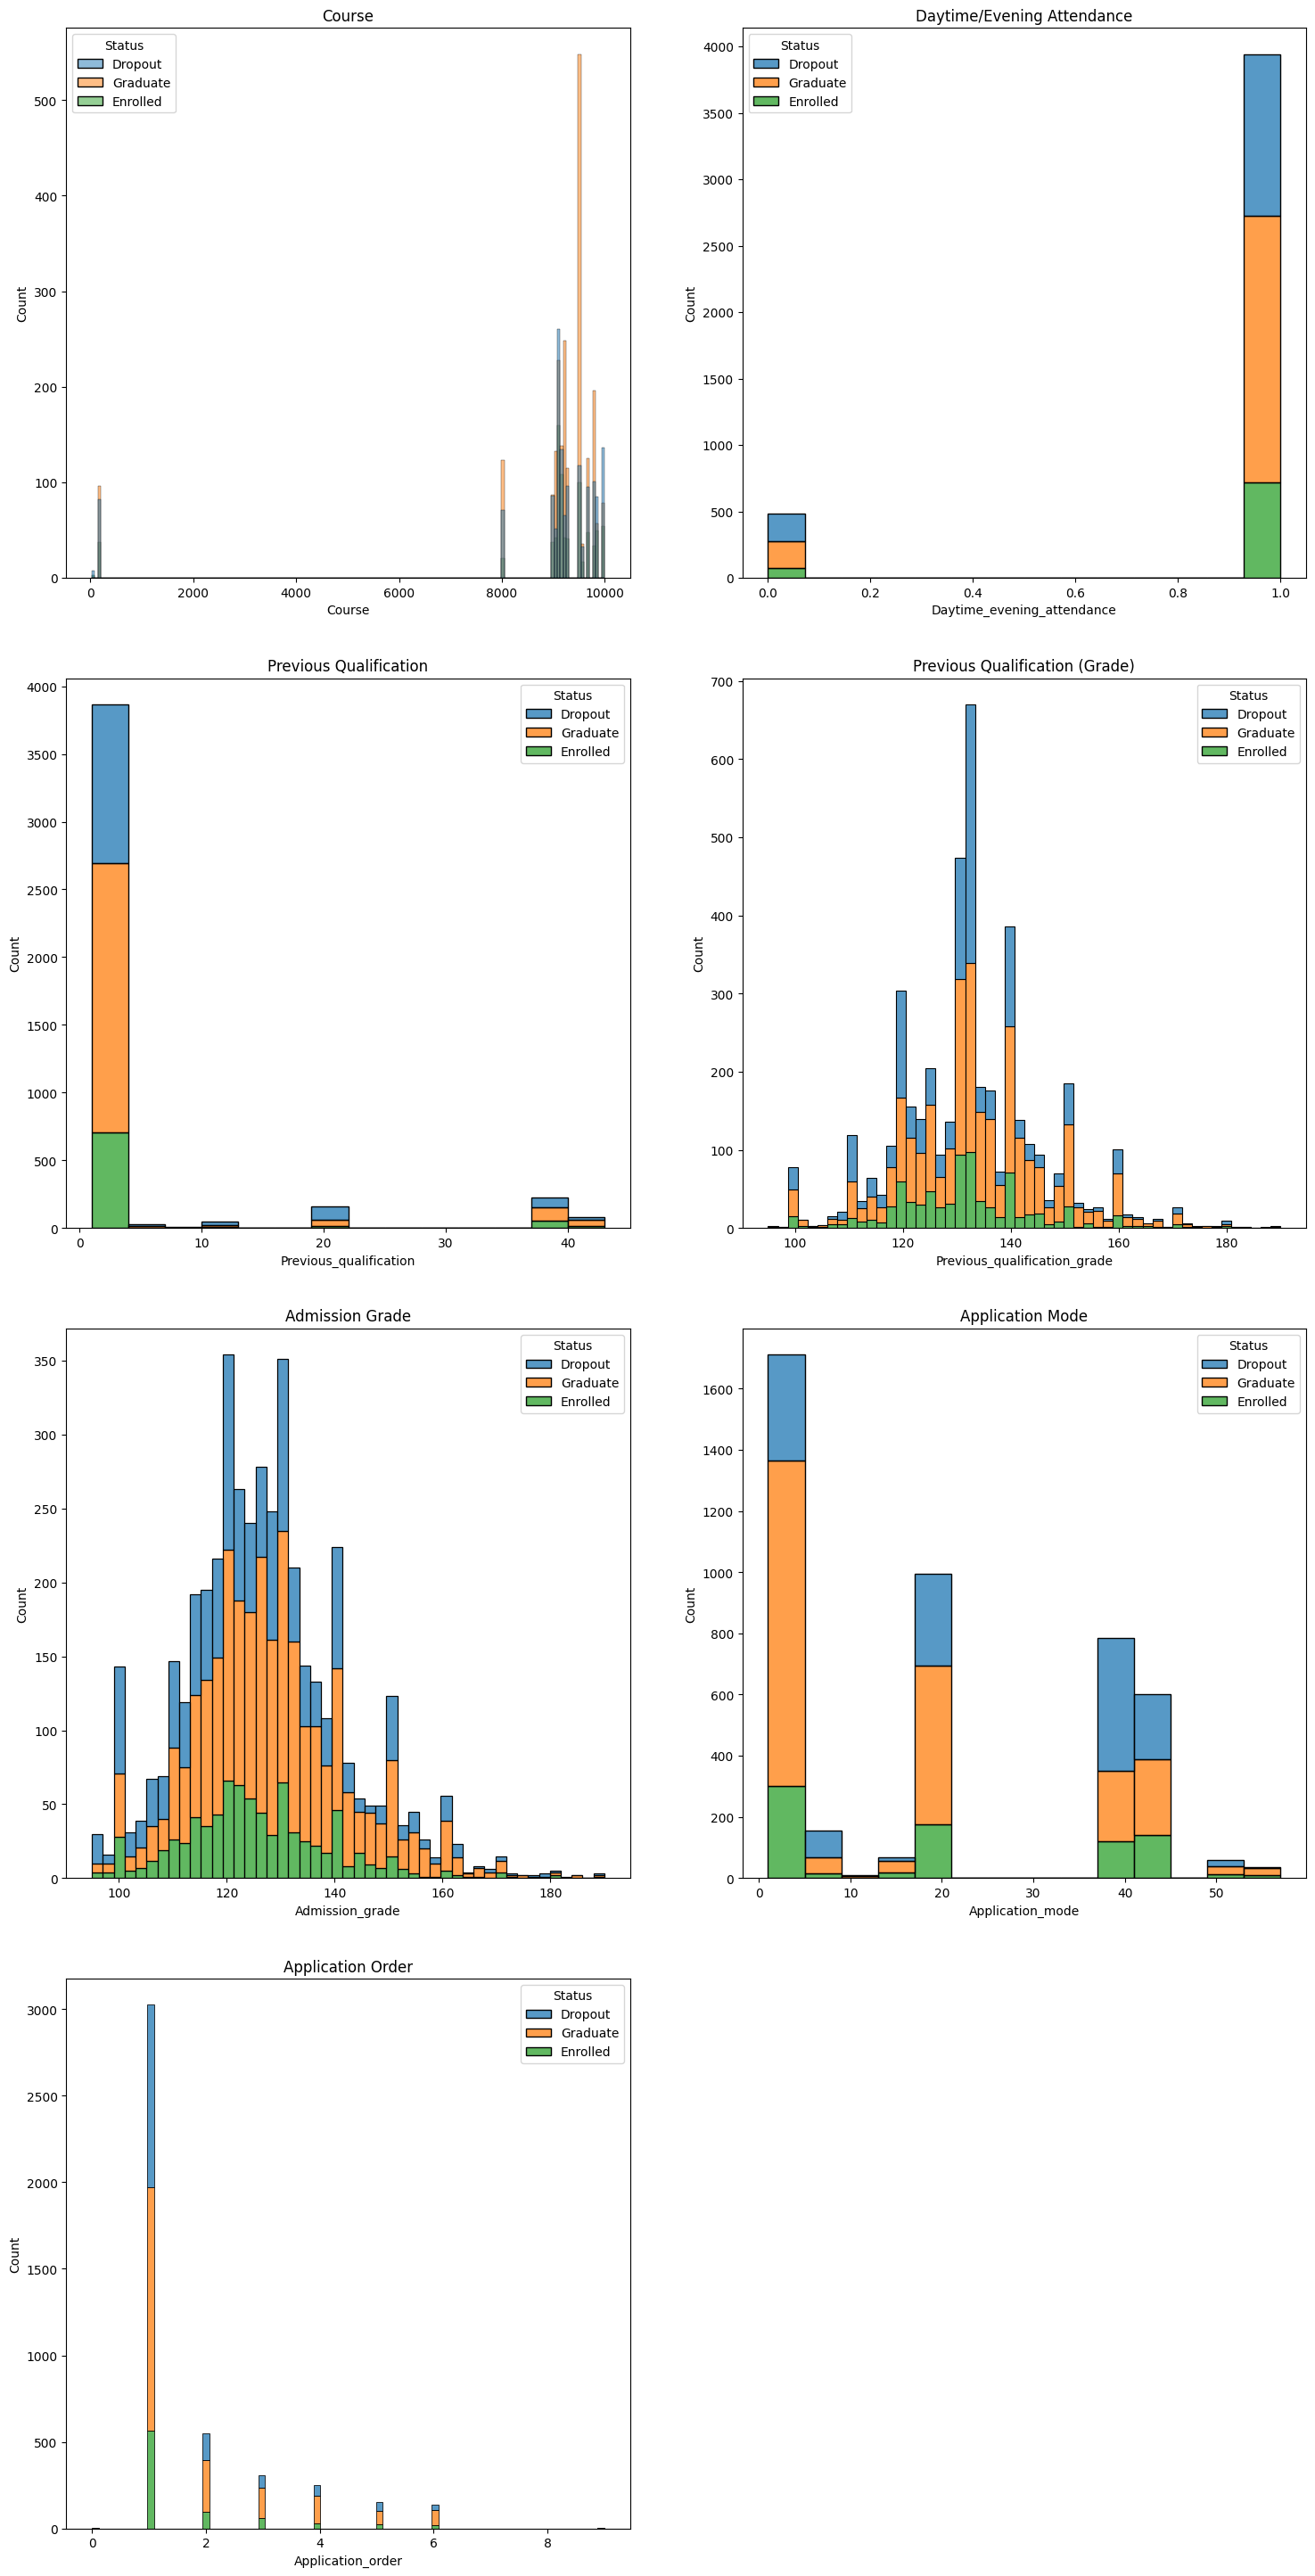

In [11]:
# Setup Figure
fig, ax = plt.subplots(4, 2, figsize=(16, 30))
fig.tight_layout(pad=6.0)

# Plot for each variable
sns.histplot(data = df, x = 'Course', hue='Status', ax=ax[0,0])
ax[0,0].set_title('Course')

sns.histplot(data=df, x='Daytime_evening_attendance', hue='Status', multiple='stack', ax=ax[0,1])
ax[0,1].set_title('Daytime/Evening Attendance')

sns.histplot(data=df, x='Previous_qualification', hue='Status', multiple='stack', ax=ax[1,0])
ax[1,0].set_title('Previous Qualification')

sns.histplot(data=df, x='Previous_qualification_grade', hue='Status', multiple='stack', ax=ax[1,1])
ax[1,1].set_title('Previous Qualification (Grade)')

sns.histplot(data=df, x='Admission_grade', hue='Status', multiple='stack', ax=ax[2,0])
ax[2,0].set_title('Admission Grade')

sns.histplot(data=df, x='Application_mode', hue='Status', multiple='stack', ax=ax[2,1])
ax[2,1].set_title('Application Mode')

sns.histplot(data=df, x='Application_order', hue='Status', multiple='stack', ax=ax[3,0])
ax[3,0].set_title('Application Order')

# Remove empty plot on the last subplot
ax[3,1].axis('off')

plt.show()

## 2.3| Kinerja Akademik
Data terkait hasil akademik siswa berdasarkan kinerja mereka pada setiap semester.
- `Curricular units 1st sem (credited)`: Jumlah unit yang diakui.
- `Curricular units 1st sem (enrolled)`: Jumlah unit yang diambil.
- `Curricular units 1st sem (evaluations)`: Jumlah unit yang dinilai.
- `Curricular units 1st sem (approved)`: Jumlah unit yang lulus.
- `Curricular units 1st sem (geade)`: Nilai pada semester 1.
- `Curricular units 1st sem (without evaluations)`: Jumlah unit yang tidak dinilai.
- `Curricular units 2st sem (credited)`: Jumlah unit yang diakui.
- `Curricular units 2st sem (enrolled)`: Jumlah unit yang diambil.
- `Curricular units 2st sem (evaluations)`: Jumlah unit yang dinilai.
- `Curricular units 2st sem (approved)`: Jumlah unit yang lulus.
- `Curricular units 2st sem (geade)`: Nilai pada semester 2.
- `Curricular units 2st sem (without evaluations)`: Jumlah unit yang tidak dinilai.

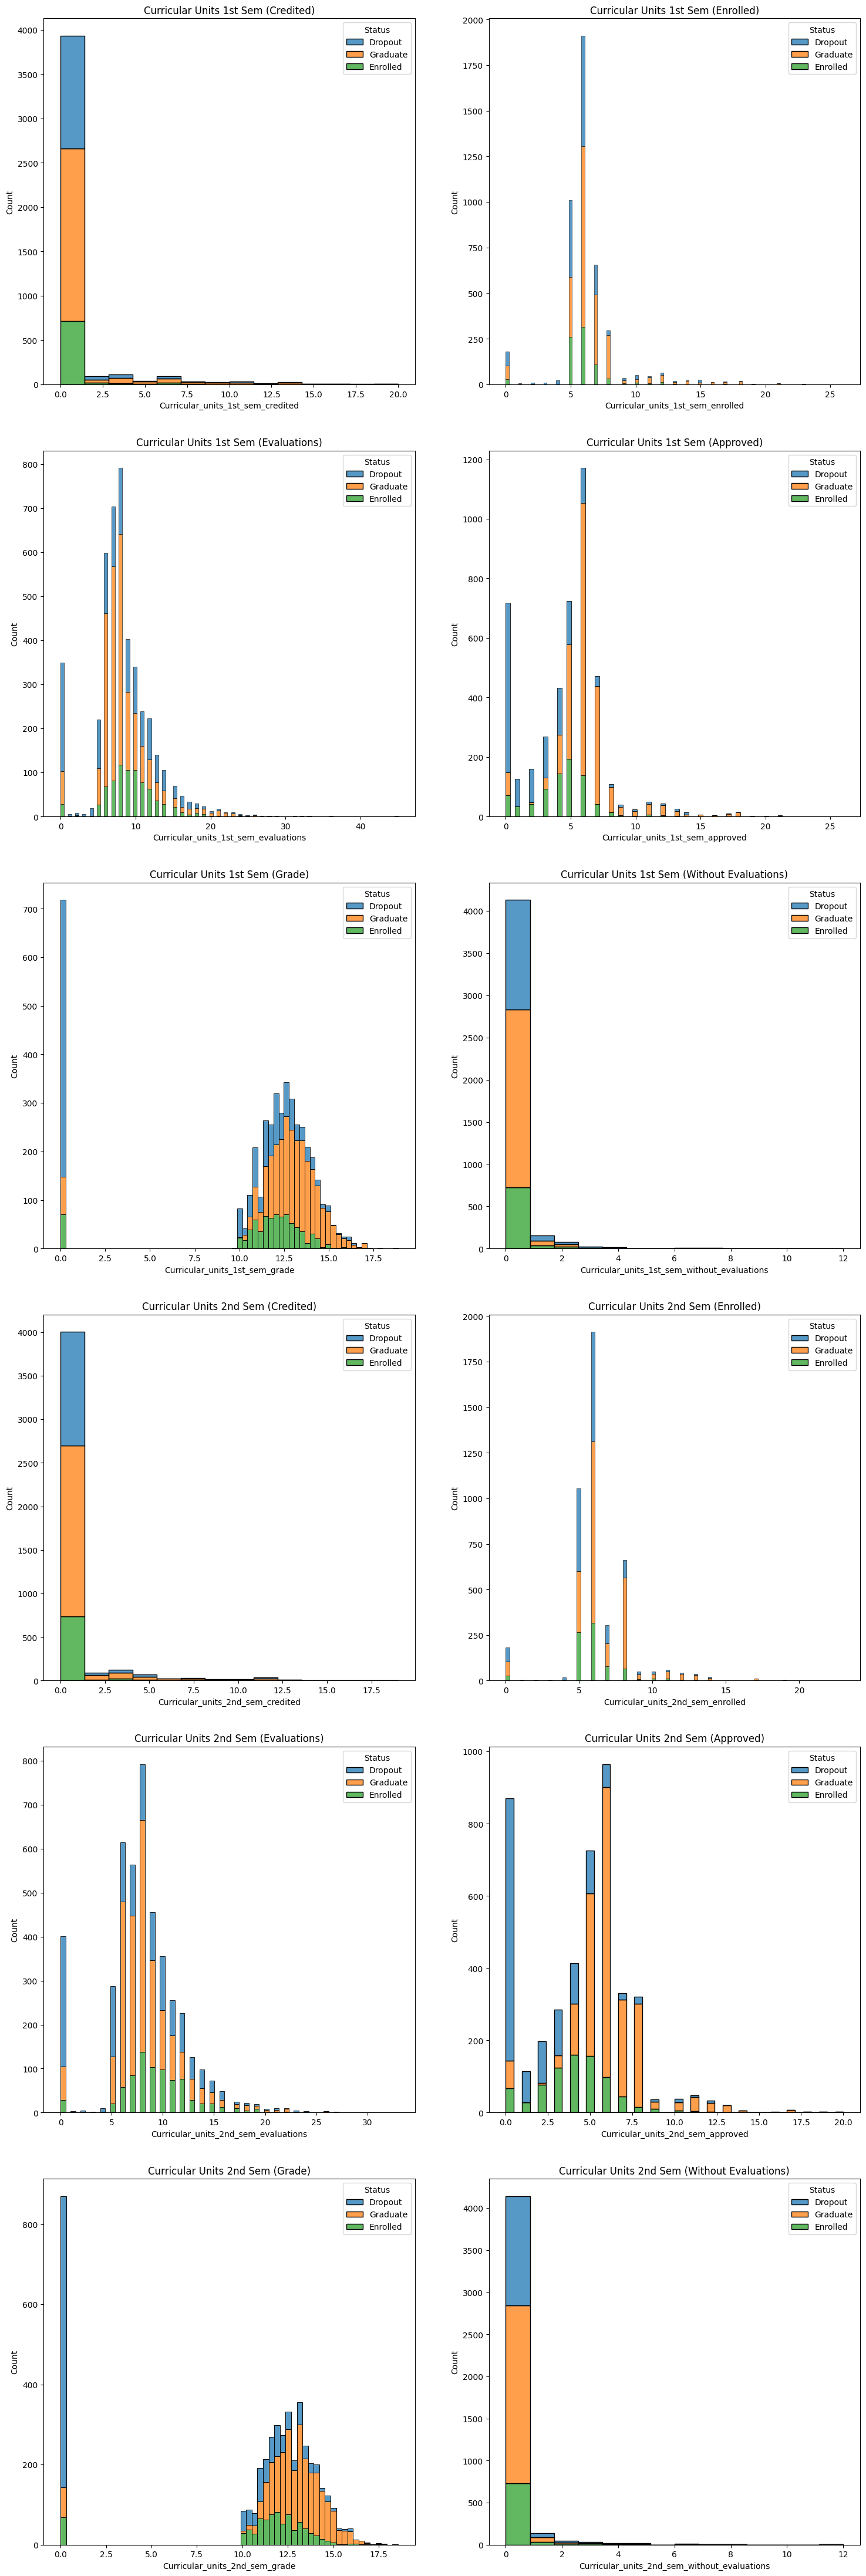

In [12]:
# Setup Figure (6 rows, 2 columns)
fig, ax = plt.subplots(6, 2, figsize=(16, 45))
fig.tight_layout(pad=6.0)

# Plot for each variable
sns.histplot(data=df, x='Curricular_units_1st_sem_credited', hue='Status', multiple='stack', ax=ax[0,0])
ax[0,0].set_title('Curricular Units 1st Sem (Credited)')

sns.histplot(data=df, x='Curricular_units_1st_sem_enrolled', hue='Status', multiple='stack', ax=ax[0,1])
ax[0,1].set_title('Curricular Units 1st Sem (Enrolled)')

sns.histplot(data=df, x='Curricular_units_1st_sem_evaluations', hue='Status', multiple='stack', ax=ax[1,0])
ax[1,0].set_title('Curricular Units 1st Sem (Evaluations)')

sns.histplot(data=df, x='Curricular_units_1st_sem_approved', hue='Status', multiple='stack', ax=ax[1,1])
ax[1,1].set_title('Curricular Units 1st Sem (Approved)')

sns.histplot(data=df, x='Curricular_units_1st_sem_grade', hue='Status', multiple='stack', ax=ax[2,0])
ax[2,0].set_title('Curricular Units 1st Sem (Grade)')

sns.histplot(data=df, x='Curricular_units_1st_sem_without_evaluations', hue='Status', multiple='stack', ax=ax[2,1])
ax[2,1].set_title('Curricular Units 1st Sem (Without Evaluations)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_credited', hue='Status', multiple='stack', ax=ax[3,0])
ax[3,0].set_title('Curricular Units 2nd Sem (Credited)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_enrolled', hue='Status', multiple='stack', ax=ax[3,1])
ax[3,1].set_title('Curricular Units 2nd Sem (Enrolled)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_evaluations', hue='Status', multiple='stack', ax=ax[4,0])
ax[4,0].set_title('Curricular Units 2nd Sem (Evaluations)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_approved', hue='Status', multiple='stack', ax=ax[4,1])
ax[4,1].set_title('Curricular Units 2nd Sem (Approved)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_grade', hue='Status', multiple='stack', ax=ax[5,0])
ax[5,0].set_title('Curricular Units 2nd Sem (Grade)')

sns.histplot(data=df, x='Curricular_units_2nd_sem_without_evaluations', hue='Status', multiple='stack', ax=ax[5,1])
ax[5,1].set_title('Curricular Units 2nd Sem (Without Evaluations)')

plt.show()


## 2.4| Sosial Ekonomi
Data yang berhubungan dengan latar belakang ekonomi siswa dan status sosial.

- `Scholarship holder`: Apakah siswa menerima beasiswa.
- Debtor: Status tunggakan.
- `Tuition fees up to date`: Apakah pembayaran biaya kuliah sudah sesuai jadwal.
- `Displaced`: Apakah siswa merupakan perantau.
- `Educational special needs`: Kebutuhan pendidikan khusus.

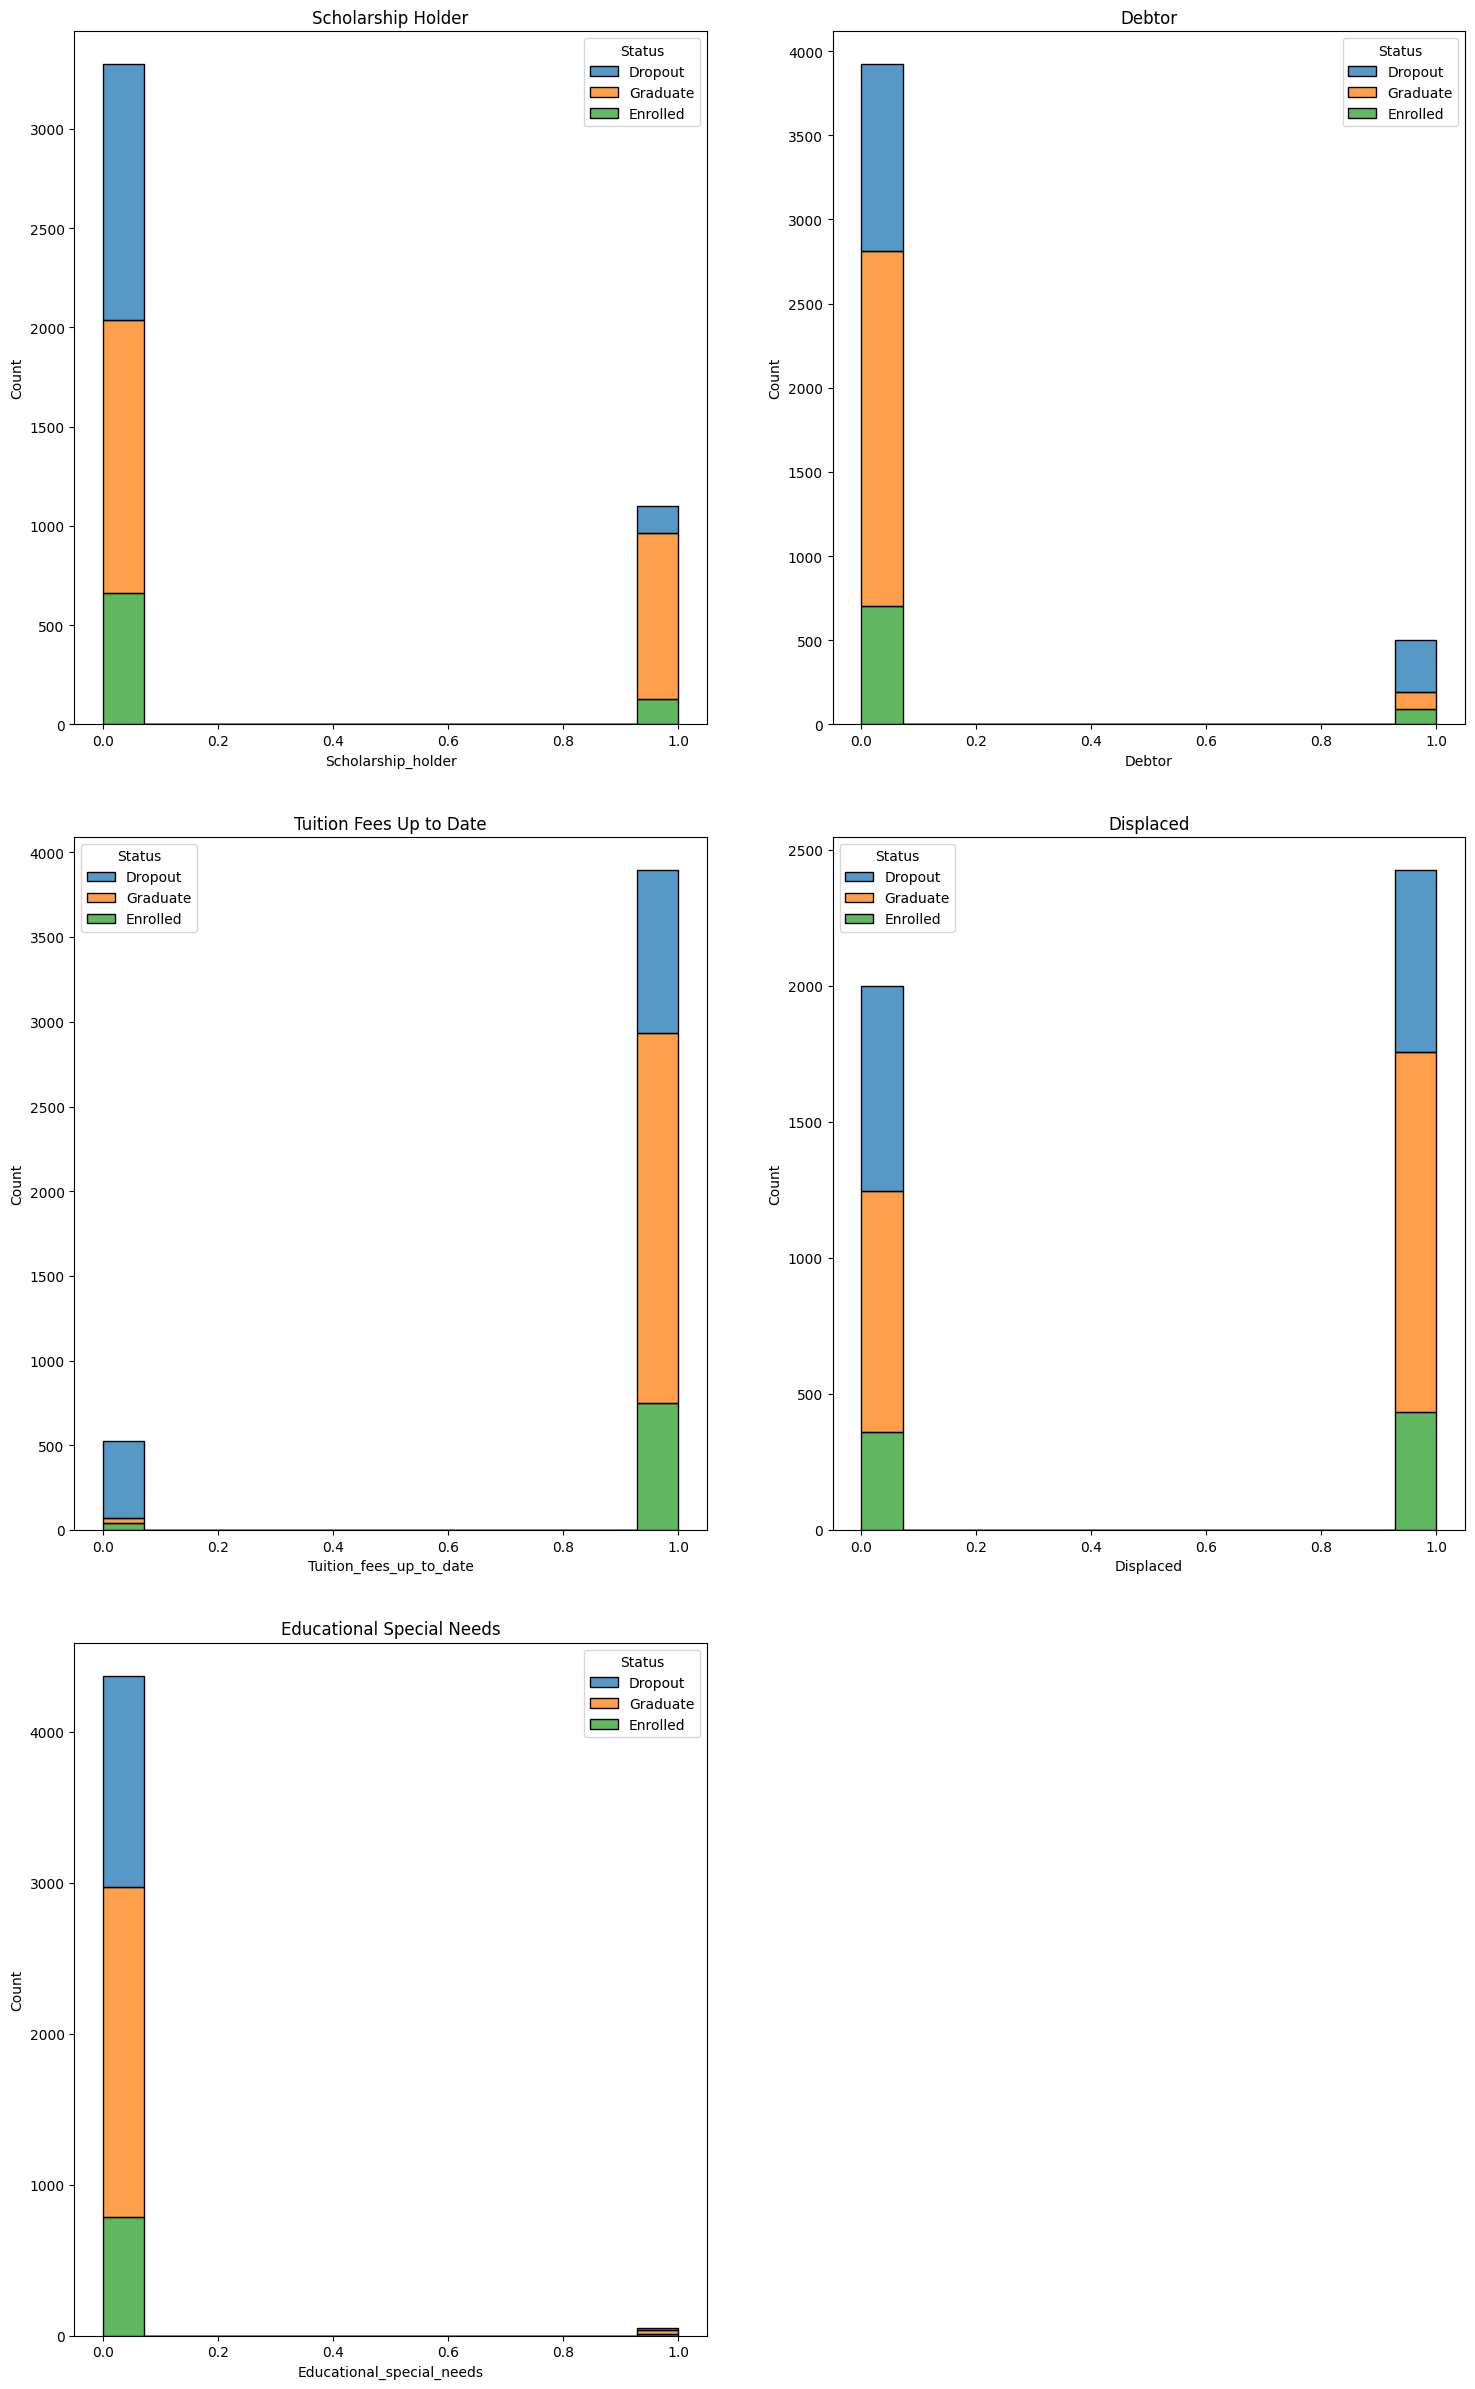

In [13]:
# Setup Figure (3 rows, 2 columns)
fig, ax = plt.subplots(3, 2, figsize=(16, 25))
fig.tight_layout(pad=6.0)

# Plot for each variable
sns.histplot(data=df, x='Scholarship_holder', hue='Status', multiple='stack', ax=ax[0,0])
ax[0,0].set_title('Scholarship Holder')

sns.histplot(data=df, x='Debtor', hue='Status', multiple='stack', ax=ax[0,1])
ax[0,1].set_title('Debtor')

sns.histplot(data=df, x='Tuition_fees_up_to_date', hue='Status', multiple='stack', ax=ax[1,0])
ax[1,0].set_title('Tuition Fees Up to Date')

sns.histplot(data=df, x='Displaced', hue='Status', multiple='stack', ax=ax[1,1])
ax[1,1].set_title('Displaced')

sns.histplot(data=df, x='Educational_special_needs', hue='Status', multiple='stack', ax=ax[2,0])
ax[2,0].set_title('Educational Special Needs')

# Remove empty plot on the last subplot
ax[2,1].axis('off')

plt.show()

## 2.5| Faktor Internasional
Informasi terkait status dan asal siswa internasional.

- `International`: Apakah siswa merupakan mahasiswa internasional.
- `Application mode`: Jalur masuk khusus untuk mahasiswa internasional (misalnya "International student").

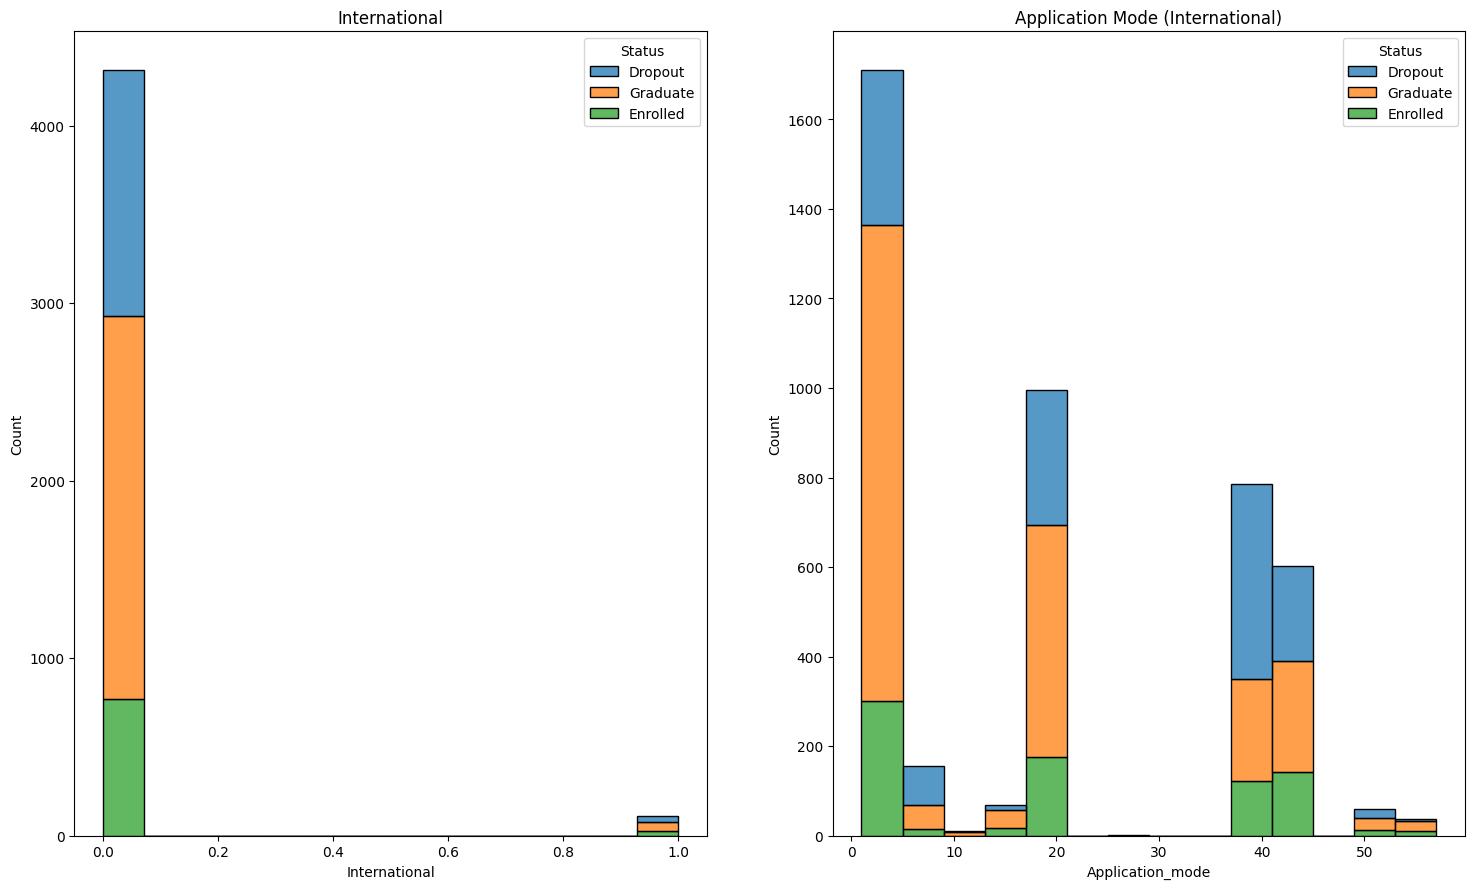

In [14]:
# Setup Figure (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
fig.tight_layout(pad=6.0)

# Plot for each variable
sns.histplot(data=df, x='International', hue='Status', multiple='stack', ax=ax[0])
ax[0].set_title('International')

sns.histplot(data=df, x='Application_mode', hue='Status', multiple='stack', ax=ax[1])
ax[1].set_title('Application Mode (International)')

plt.show()

## 2.6| Faktor Ekonomi Makro
- `Unemployment Rate`: Persentase pengangguran di negara atau wilayah tempat mahasiswa berkuliah.
- `Inflation Rate`: Tingkat inflasi yang mempengaruhi daya beli dan mungkin berdampak pada kesulitan keuangan mahasiswa.
- `GDP (Gross Domestic Product)`: Produk domestik bruto yang menunjukkan keadaan ekonomi di negara mahasiswa tersebut berkuliah.

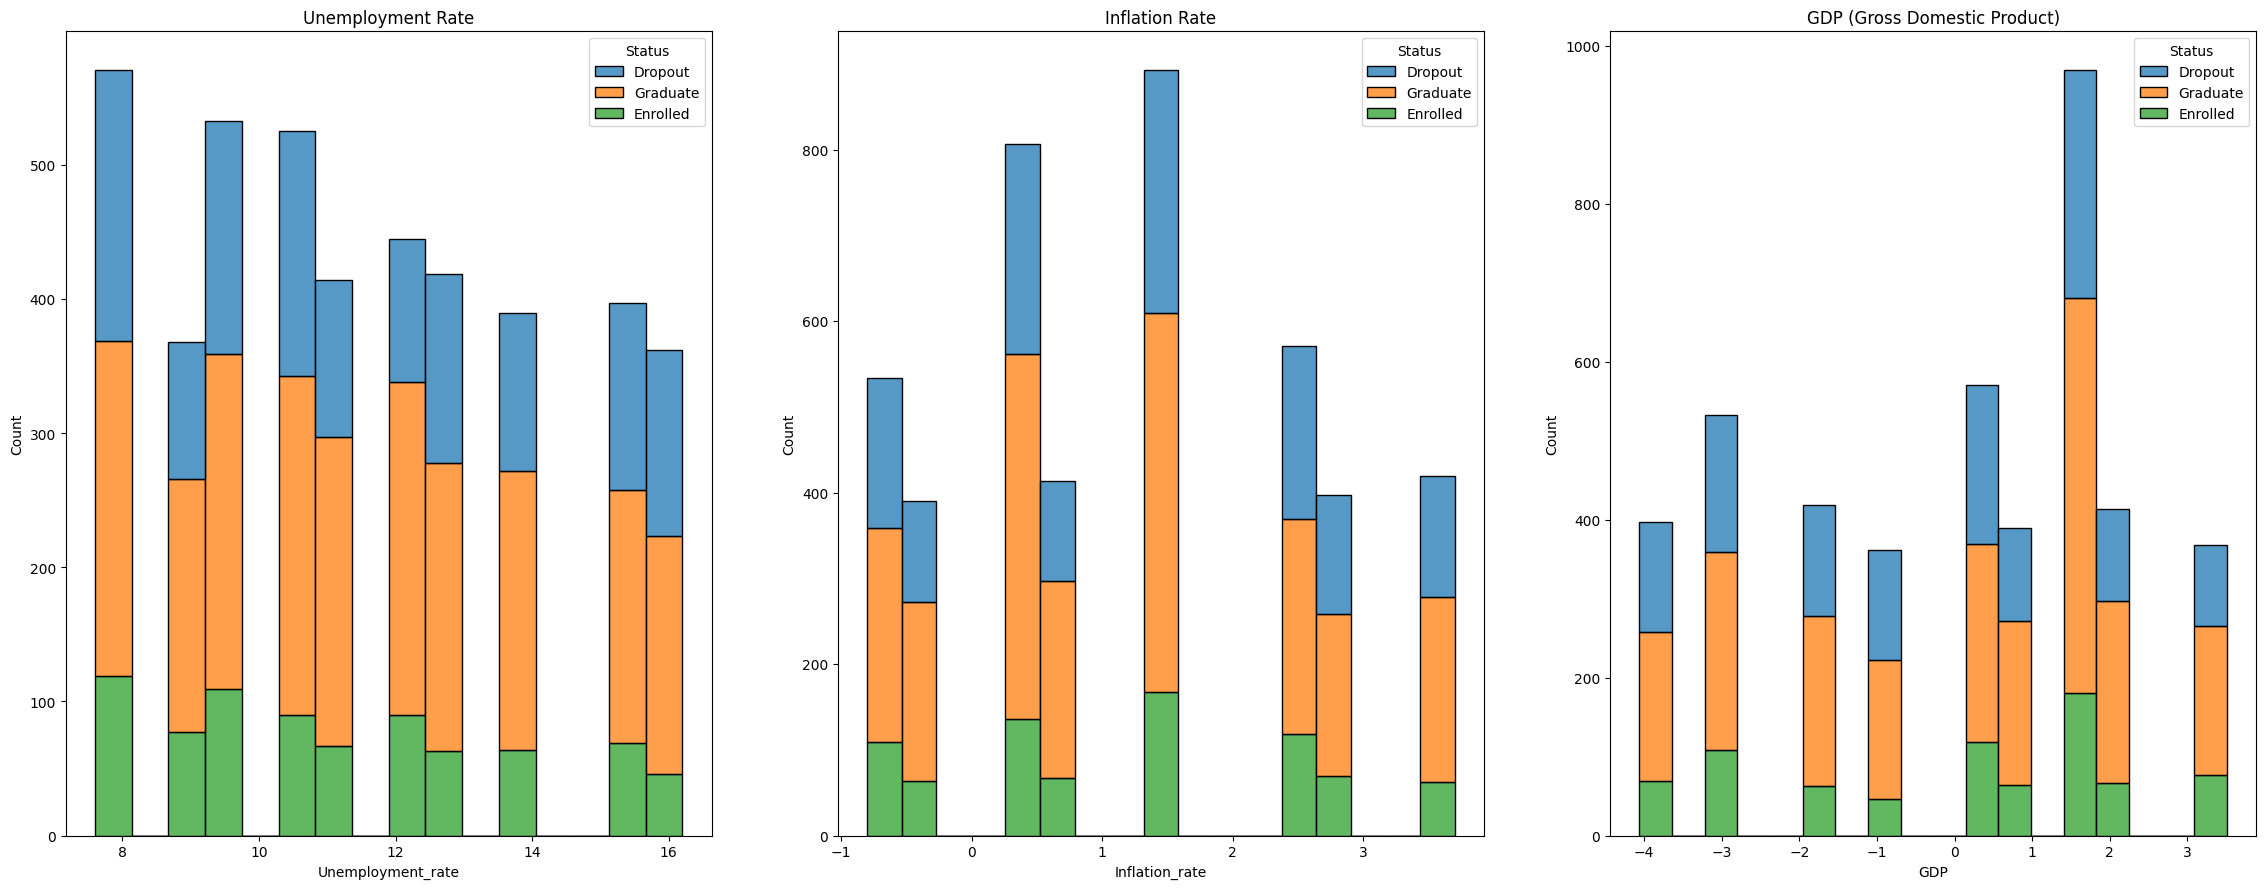

In [15]:
# Setup Figure (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(24, 10))
fig.tight_layout(pad=6.0)

# Plot for each economic variable
sns.histplot(data=df, x='Unemployment_rate', hue='Status', multiple='stack', ax=ax[0])
ax[0].set_title('Unemployment Rate')

sns.histplot(data=df, x='Inflation_rate', hue='Status', multiple='stack', ax=ax[1])
ax[1].set_title('Inflation Rate')

sns.histplot(data=df, x='GDP', hue='Status', multiple='stack', ax=ax[2])
ax[2].set_title('GDP (Gross Domestic Product)')

plt.show()

# 3| Data Preparation / Preprocessing

## 3.1| Mapping target ke numerik

In [16]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [17]:
# Menghapus baris dengan status 'Enrolled'
df = df[df['Status'] != 'Enrolled']

In [18]:
df['Status'] = df['Status'].map({
    'Dropout':0,
    'Graduate':1
})

In [19]:
df['Status'].unique()

array([0, 1])

## 3.2| Feature Selection

In [20]:
df.corr()['Status']

Marital_status                                 -0.100479
Application_mode                               -0.244507
Application_order                               0.094355
Course                                          0.038135
Daytime_evening_attendance                      0.084496
Previous_qualification                         -0.062323
Previous_qualification_grade                    0.109464
Nacionality                                    -0.015516
Mothers_qualification                          -0.053989
Fathers_qualification                          -0.005865
Mothers_occupation                              0.000772
Fathers_occupation                              0.005066
Admission_grade                                 0.128058
Displaced                                       0.126113
Educational_special_needs                      -0.007254
Debtor                                         -0.267207
Tuition_fees_up_to_date                         0.442138
Gender                         

*Feature Scaling*

In [21]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Status',axis=1))
X=scaled_df
Y=df['Status'].values

## 3.3| Splitting data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## 3.4| Oversampling

In [23]:
oversampler = SMOTE(random_state=42)
x_train_smote, y_train_smote = oversampler.fit_resample(x_train, y_train)

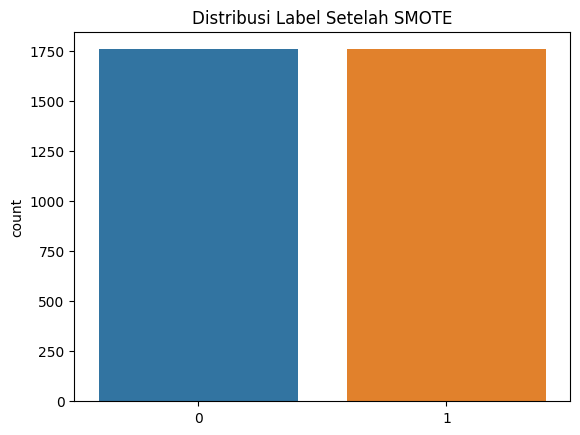

In [24]:
sns.countplot(x=y_train_smote)
plt.title('Distribusi Label Setelah SMOTE')
plt.show()

## Modeling

In [25]:
# Model
model = Sequential()
model.add(Dense(input_dim=36, units=16, activation='relu'))
model.add(Dense(units=32, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=64, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313 (12.94 KB)

 Trainable params: 3,313 (12.94 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
History=model.fit(x_train_smote,y_train_smote,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6611 - loss: 0.6761 - val_accuracy: 0.8678 - val_loss: 0.3933
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3645 - val_accuracy: 0.8829 - val_loss: 0.3497
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.3161 - val_accuracy: 0.8939 - val_loss: 0.3213
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2927 - val_accuracy: 0.9036 - val_loss: 0.3093
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2717 - val_accuracy: 0.8994 - val_loss: 0.3181
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.2678 - val_accuracy: 0.9050 - val_loss: 0.3049
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.2367 - val_accuracy: 0.9050 - val_loss: 0.3031
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.2391 - val_accuracy: 0.

In [33]:
#simpan model
model.save('model.h5')

## Evaluation

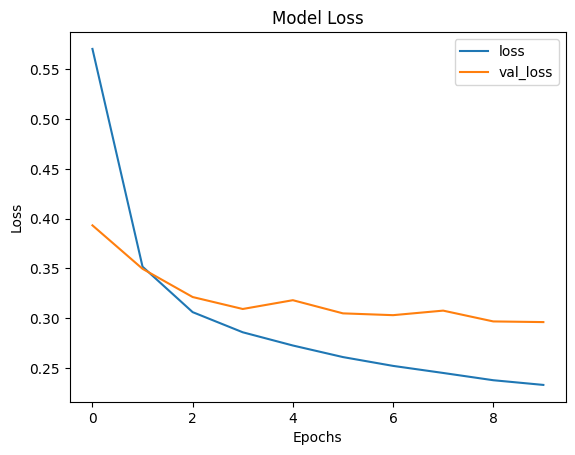

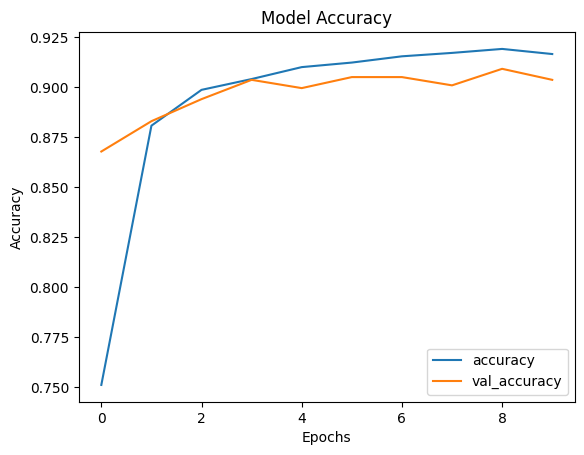

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [30]:
y_pred = model.predict(x_test)

# Ubah prediksi probabilitas menjadi kelas (threshold 0.5)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Hitung F1-Score
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("F1-Score:", f1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision: 0.9128540305010894
Recall: 0.933184855233853
Confusion Matrix:
 [[237  40]
 [ 30 419]]
F1-Score: 0.9229074889867841


In [31]:
model.evaluate(x_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9056 - loss: 0.2948 


[0.2961583733558655, 0.9035812616348267]

Model memiliki kinerja yang baik dengan precision dan recall yang tinggi, yang berarti model ini cukup efektif dalam mengklasifikasikan data positif dan negatif dengan benar. Dengan akurasi validasi 90%, model menunjukkan generalisasi yang baik pada data yang belum dilihat sebelumnya. 

In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
